# PAA - Ordenação

## Setup

In [1]:
%pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
!gcc --version

gcc (MinGW.org GCC-6.3.0-1) 6.3.0
Copyright (C) 2016 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



### Importação

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import os
import shutil

## Criação dos valores a serem ordenados

In [3]:
qtd_values = [200_000, 400_000, 600_000,1_000_000]
dados = {
  'Ordem_crescente': [np.arange(1, qtd + 1) for qtd in qtd_values],
  'Ordem_decrescente': [np.arange(qtd, 0, -1) for qtd in qtd_values],
  'Ordem_aleatoria_pemutation': [np.random.permutation(qtd) for qtd in qtd_values]
}

### Exibindo amostragem


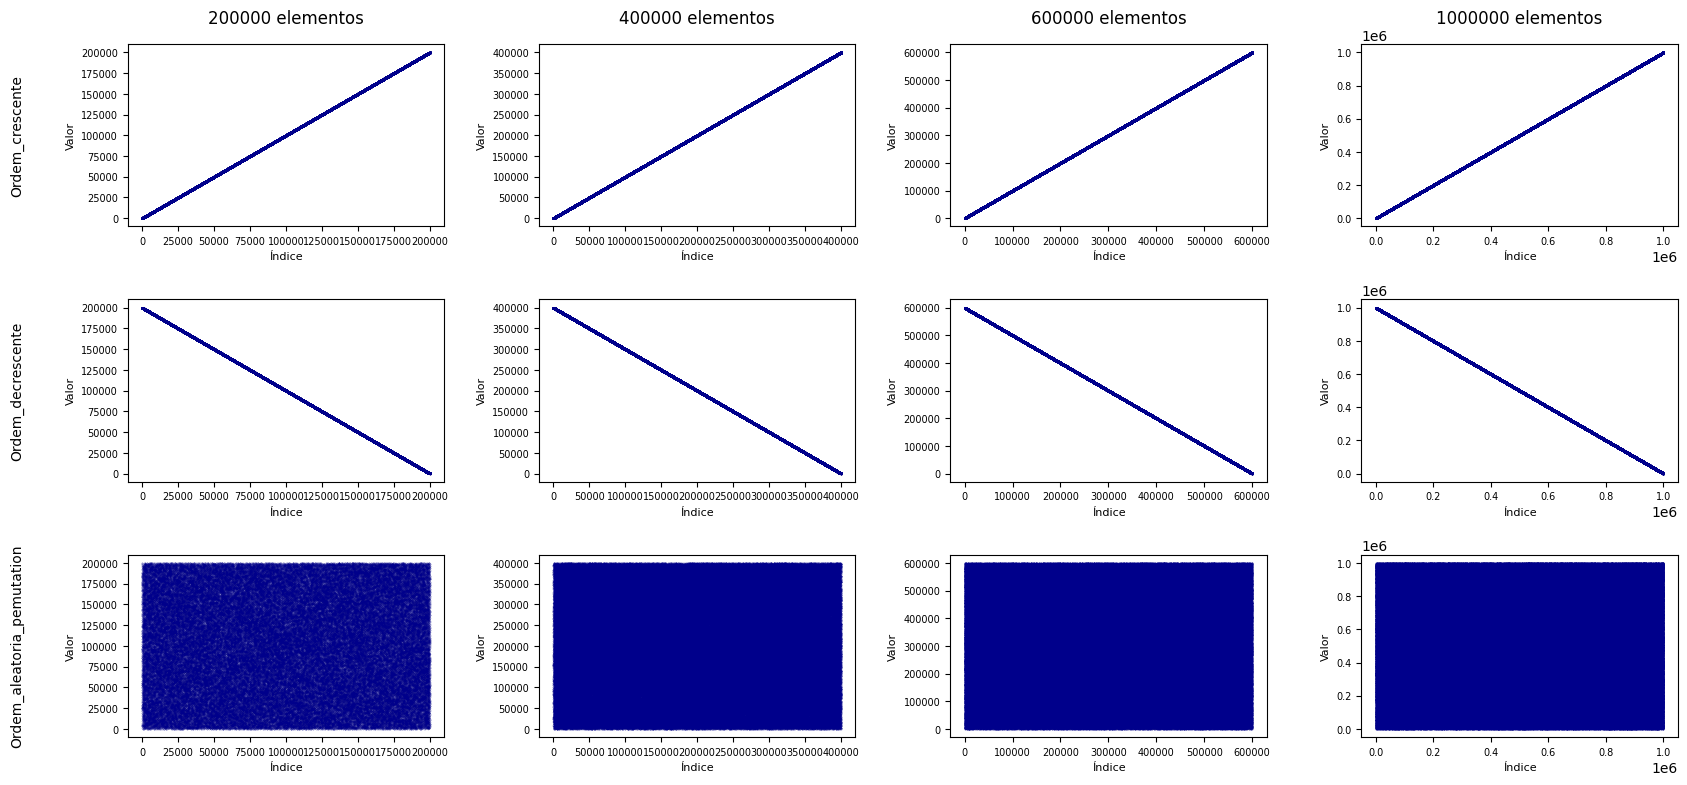

In [4]:
n_rows = len(dados)
n_cols = len(qtd_values)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5*n_cols, 3*n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for ax, qtd in zip(axs[0] if n_rows > 1 else axs, qtd_values):
    ax.set_title(f'{qtd} elementos', pad=15)

for row_idx, (ordem, valores) in enumerate(dados.items()):
    for col_idx, arr in enumerate(valores):
        ax = axs[row_idx, col_idx] if n_rows > 1 else axs[col_idx]
        x = np.arange(len(arr))
        ax.scatter(x, arr, s=0.1, alpha=0.3, color='darkblue')
        ax.set_xlabel('Índice', fontsize=8)
        ax.set_ylabel('Valor', fontsize=8)
        ax.tick_params(axis='both', labelsize=7)

    if n_rows > 1:
        axs[row_idx, 0].annotate(
            ordem,
            xy=(-0.25 if n_cols <=3 else -0.35, 0.5),
            xycoords='axes fraction',
            rotation=90,
            fontsize=10,
            ha='center',
            va='center'
        )
    else:
        axs[0].annotate(
            ordem,
            xy=(-0.25 if n_cols <=3 else -0.35, 0.5),
            xycoords='axes fraction',
            rotation=90,
            fontsize=10,
            ha='center',
            va='center'
        )

plt.show()

### Salvando amostragem em txt

In [5]:
paths = []

shutil.rmtree('files', ignore_errors=True)
os.makedirs('files', exist_ok=True)

for title, values in dados.items():
    for i, value in enumerate(values):
        path = f'files/{title}/{len(value)}.csv'
        paths.append(path)
        
        os.makedirs(os.path.dirname(path), exist_ok=True)
        
        df = pd.DataFrame(value)
        df.to_csv(path, index=False, header=False)
        
print(f'Arquivos salvos em {os.path.abspath("files")}')

Arquivos salvos em c:\Users\jonas\Documents\Codigos Curso\PAA\Trabalho 1 - PAA\files


## Block Sorting

O tipo de bloco é um algoritmo de classificação que classifica um array dividindo-o em blocos de tamanho fixo, classificando cada bloco individualmente e, em seguida, mesclando os blocos classificados de volta em uma única matriz ordenada. O Block sort é uma boa opção para classificar grandes conjuntos de dados que não cabem na memória. Ele pode classificar eficientemente os dados em blocos que se encaixam na memória e, em seguida, mesclar os blocos classificados juntos para obter a matriz ordenada final.



### Executando o algoritmo para cada amostragem



In [6]:
%%capture results_block_sort
args = f""
results = {}

for path in paths:
    tamanho = path.split('/')[-1].split('.')[0]
    
    args_copy = f"""FILE_PATH={path} SIZE_ARR={tamanho} BLOCK_SIZE={int(tamanho) / 4} SHOW_VECTOR_RESULT=0 QTD_TESTES=20
    """
    
    !make -B block_sort {args_copy}

In [8]:
print(results_block_sort.stdout)

files/Ordem_crescente/200000.csv 0.020000
files/Ordem_crescente/400000.csv 0.041000
files/Ordem_crescente/600000.csv 0.062000
files/Ordem_crescente/1000000.csv 0.107000
files/Ordem_decrescente/200000.csv 0.020000
files/Ordem_decrescente/400000.csv 0.042000
files/Ordem_decrescente/600000.csv 0.063000
files/Ordem_decrescente/1000000.csv 0.109000
files/Ordem_aleatoria_pemutation/200000.csv 0.022000
files/Ordem_aleatoria_pemutation/400000.csv 0.044000
files/Ordem_aleatoria_pemutation/600000.csv 0.066000
files/Ordem_aleatoria_pemutation/1000000.csv 0.110000



# Radix Sort

In [9]:
%%capture results_radix_sort
results = {}

for path in paths:
    tamanho = path.split('/')[-1].split('.')[0]
    
    args_copy = f"FILE_PATH={path} SIZE_ARR={tamanho} SHOW_VECTOR_RESULT=0 QTD_TESTES=20"
    
    !make -B radix_sort {args_copy}
    

In [10]:
print(results_radix_sort.stdout)

files/Ordem_crescente/200000.csv 0.018000
files/Ordem_crescente/400000.csv 0.037000
files/Ordem_crescente/600000.csv 0.055000
files/Ordem_crescente/1000000.csv 0.108000
files/Ordem_decrescente/200000.csv 0.018000
files/Ordem_decrescente/400000.csv 0.037000
files/Ordem_decrescente/600000.csv 0.055000
files/Ordem_decrescente/1000000.csv 0.108000
files/Ordem_aleatoria_pemutation/200000.csv 0.018000
files/Ordem_aleatoria_pemutation/400000.csv 0.037000
files/Ordem_aleatoria_pemutation/600000.csv 0.055000
files/Ordem_aleatoria_pemutation/1000000.csv 0.093000



## Show values

In [11]:
def processing(output):
  data_processing = {}

  for line in str(output.stdout).splitlines(): # type: ignore
    if not line.startswith("files/"):
      continue

    parts = line.split()
    file_path = parts[0]
    temp = parts[1]

    type_ = file_path.split('/')[1]
    qtd = file_path.split('/')[-1].split('.')[0]

    if not data_processing.get(type_):
      data_processing[type_] = {qtd: temp}
    else:
      data_processing[type_][qtd] = temp

  return data_processing

def plot_data(data_processing):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.set_title('Análise de Tempo de Execução')
  ax.set_xlabel('Tamanho do vetor')
  ax.set_ylabel('Tempo (s)')

  ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

  for type_, data in data_processing.items():
    x = [int(k) for k in data.keys()]
    y = [float(v) for v in data.values()]
    ax.plot(x, y, label=type_, marker='o', markersize=5)

  ax.legend()
  ax.grid()
  plt.show()


### Exibindo amostragem do Block Sort

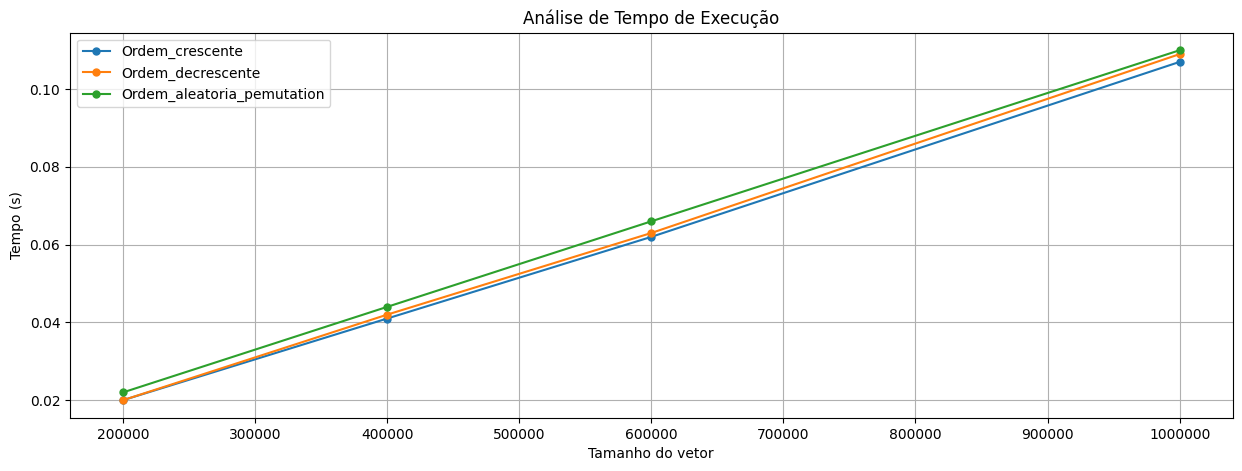

In [12]:
data_block = processing(results_block_sort)
plot_data(data_block)

### Exibindo amostragem do Radix Sort

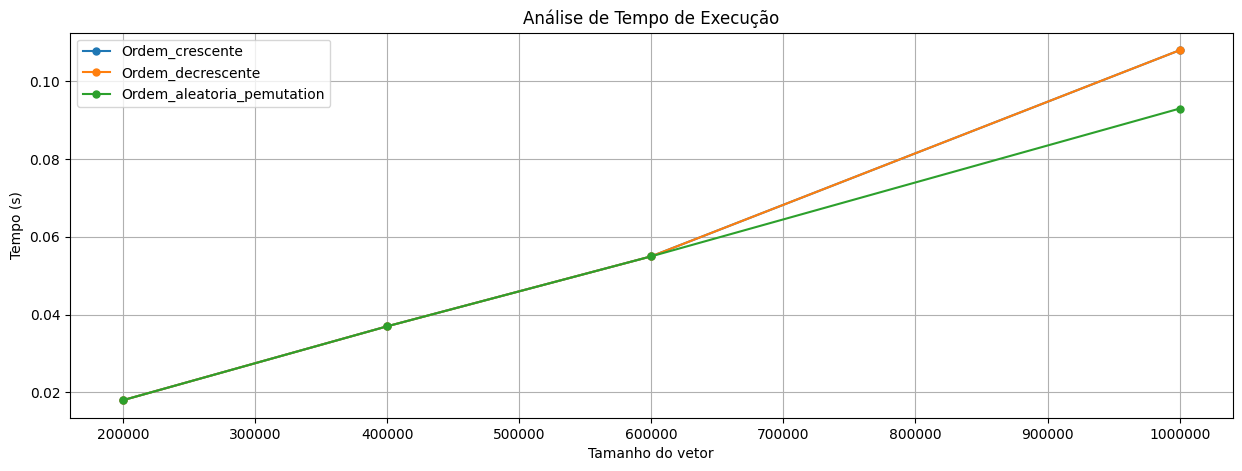

In [13]:
data_radix = processing(results_radix_sort)
plot_data(data_radix)

### Comparação entre os dois algoritmos

In [17]:
print(data_block.items())
print(data_radix.items())

dict_items([('Ordem_crescente', {'200000': '0.020000', '400000': '0.041000', '600000': '0.062000', '1000000': '0.107000'}), ('Ordem_decrescente', {'200000': '0.020000', '400000': '0.042000', '600000': '0.063000', '1000000': '0.109000'}), ('Ordem_aleatoria_pemutation', {'200000': '0.022000', '400000': '0.044000', '600000': '0.066000', '1000000': '0.110000'})])
dict_items([('Ordem_crescente', {'200000': '0.018000', '400000': '0.037000', '600000': '0.055000', '1000000': '0.108000'}), ('Ordem_decrescente', {'200000': '0.018000', '400000': '0.037000', '600000': '0.055000', '1000000': '0.108000'}), ('Ordem_aleatoria_pemutation', {'200000': '0.018000', '400000': '0.037000', '600000': '0.055000', '1000000': '0.093000'})])


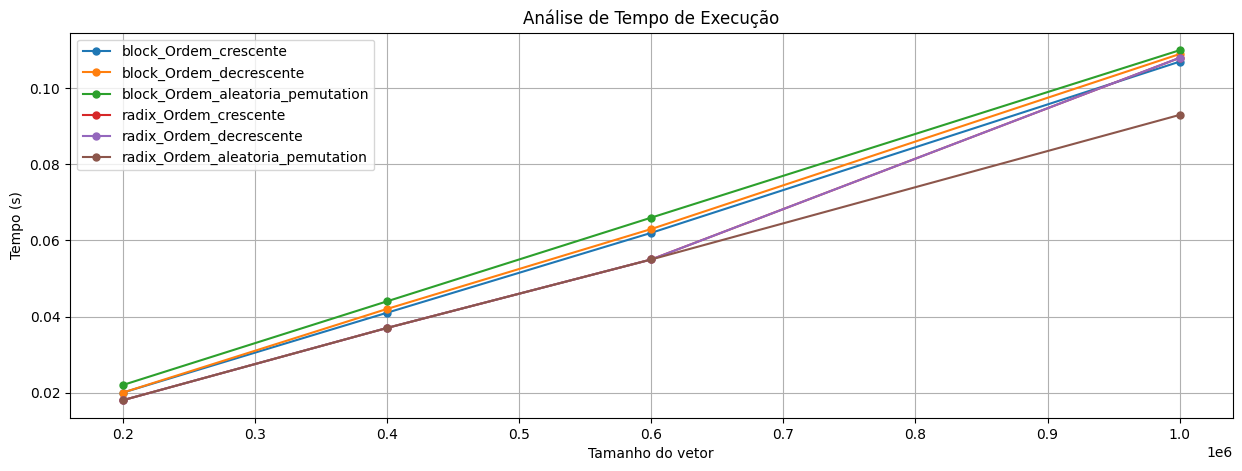

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Análise de Tempo de Execução')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo (s)')

for type_, data in data_block.items():
    x = list(map(int, data.keys()))
    y = list(map(float, data.values()))
    
    plt.plot(x, y, label=f"block_{type_}", marker='o', markersize=5)
    
for type_, data in data_radix.items():
    x = list(map(int, data.keys()))
    y = list(map(float, data.values()))
    plt.plot(x, y, label=f"radix_{type_}", marker='o', markersize=5)
    
plt.legend()
plt.grid()
plt.show()


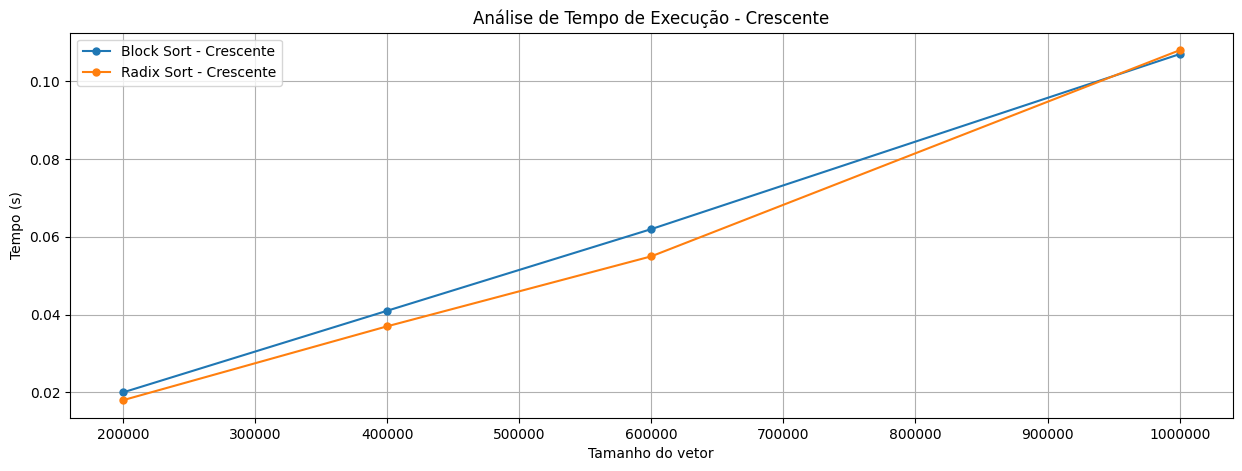

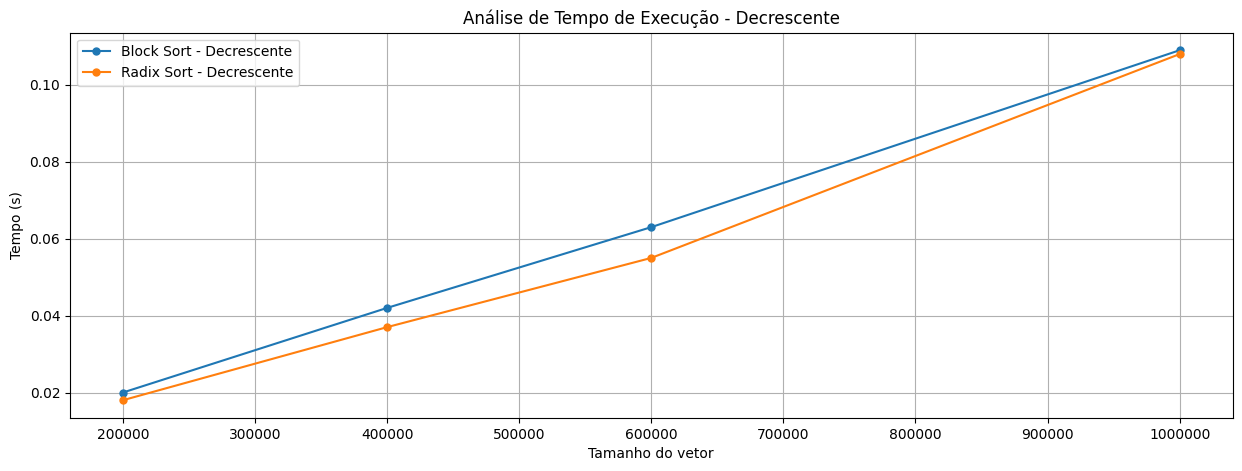

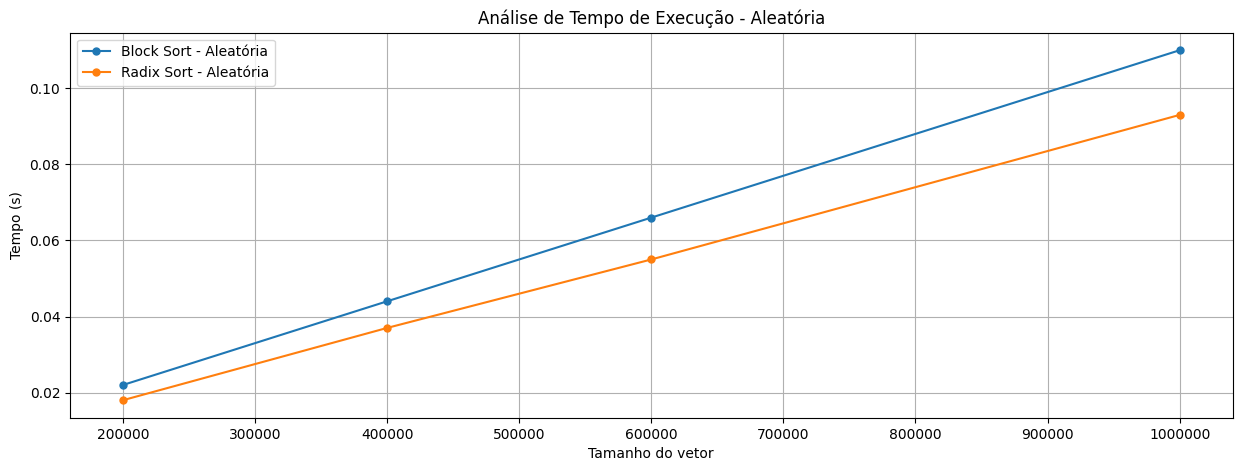

In [31]:
from matplotlib.ticker import ScalarFormatter

# Mapeando os nomes antigos para os novos
ordem_nomes = {
    'Ordem_crescente': 'Crescente',
    'Ordem_decrescente': 'Decrescente',
    'Ordem_aleatoria_pemutation': 'Aleatória'
}

for ordem, nome in ordem_nomes.items():
    plt.figure(figsize=(15, 5))
    plt.title(f'Análise de Tempo de Execução - {nome}')
    plt.xlabel('Tamanho do vetor')
    plt.ylabel('Tempo (s)')

    x_block = list(map(int, data_block[ordem].keys()))
    y_block = list(map(float, data_block[ordem].values()))
    plt.plot(x_block, y_block, label=f"Block Sort - {nome}", marker='o', markersize=5)

    x_radix = list(map(int, data_radix[ordem].keys()))
    y_radix = list(map(float, data_radix[ordem].values()))
    plt.plot(x_radix, y_radix, label=f"Radix Sort - {nome}", marker='o', markersize=5)

    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.yaxis.get_major_formatter().set_scientific(False)

    plt.legend()
    plt.grid()
    plt.show()

In [32]:
# Criando uma tabela comparativa
tabela_comparativa = []

for ordem, nome in ordem_nomes.items():
    for tamanho in qtd_values:
        tamanho_str = str(tamanho)
        tabela_comparativa.append({
            'Ordem': nome,
            'Tamanho': tamanho,
            'Block Sort (s)': float(data_block[ordem][tamanho_str]),
            'Radix Sort (s)': float(data_radix[ordem][tamanho_str])
        })

# Convertendo para DataFrame
df_comparativo = pd.DataFrame(tabela_comparativa)

# Exibindo a tabela
print(df_comparativo)

          Ordem  Tamanho  Block Sort (s)  Radix Sort (s)
0     Crescente   200000           0.020           0.018
1     Crescente   400000           0.041           0.037
2     Crescente   600000           0.062           0.055
3     Crescente  1000000           0.107           0.108
4   Decrescente   200000           0.020           0.018
5   Decrescente   400000           0.042           0.037
6   Decrescente   600000           0.063           0.055
7   Decrescente  1000000           0.109           0.108
8     Aleatória   200000           0.022           0.018
9     Aleatória   400000           0.044           0.037
10    Aleatória   600000           0.066           0.055
11    Aleatória  1000000           0.110           0.093
